In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(720, 1280, 3)


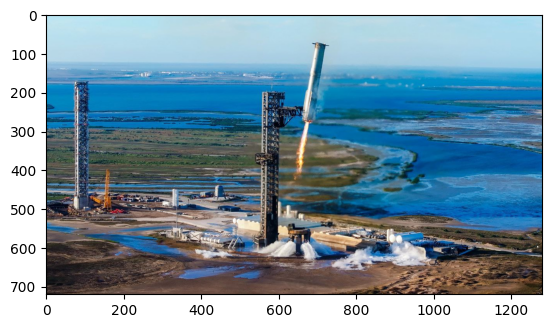

In [28]:
# оригинальня картинка

img = cv2.imread("./image.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img.shape)

In [29]:
# функции для генерации гистрграммы
# np.bincount считает количество вхождений каждого числа

def calc_hist(image_gray):
   image_flat = image_gray.flatten()
   bincount = np.bincount(image_flat, minlength=256)
   assert len(bincount) == 256
   return bincount

def calc_hist_rgb(image_bgr):
    b, g, r = cv2.split(image_bgr)

    hist_b = calc_hist(b)
    hist_g = calc_hist(g)
    hist_r = calc_hist(r)

    return hist_b, hist_g, hist_r


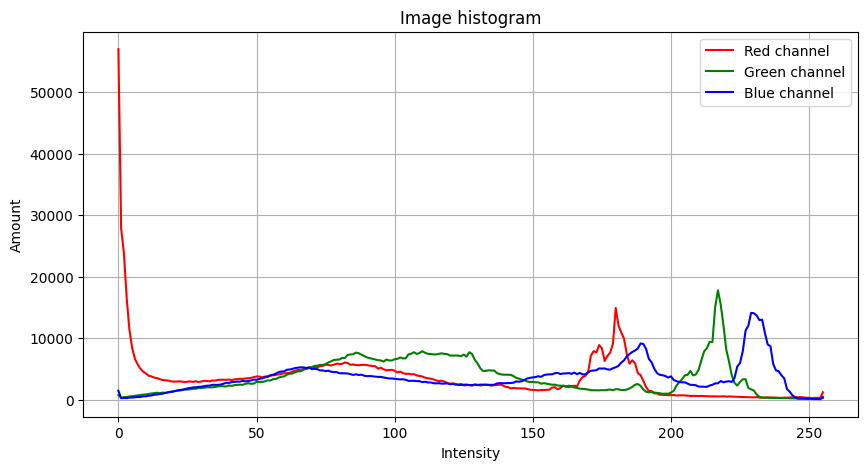

: 

In [ ]:
# гистограмма для исходной картинки

hist_b, hist_g, hist_r = calc_hist_rgb(img)

x = np.arange(256)

plt.figure(figsize=(10, 5))

plt.plot(x, hist_r, 'r', label='Red channel')
plt.plot(x, hist_g, 'g', label='Green channel')
plt.plot(x, hist_b, 'b', label='Blue channel')

plt.xlabel('Intensity')
plt.ylabel('Amount')
plt.title('Image histogram')
plt.legend()

plt.grid(True)
plt.show()

In [31]:
# функция свертки для черно-белого изображния
def convolve_2d(img_gray, kernel):
  result = np.zeros(img_gray.shape)

  img_border = cv2.copyMakeBorder(
    img_gray,
    kernel.shape[0]//2,
    kernel.shape[1]//2,
    kernel.shape[0]//2,
    kernel.shape[1]//2,
    cv2.BORDER_REPLICATE
  )
  
  for x in range(img_gray.shape[0]):
    for y in range(img_gray.shape[1]):
      area = img_border[x:x+kernel.shape[0], y:y+kernel.shape[1]]
      color = np.sum(area * kernel)
      result[x][y] = color

  # np.clip убеждается что все значения находятся в правильном диапазоне
  return np.clip(result, 0, 255).astype(np.uint8)

# функция свертки для цветного изображния
def convolve_rgb(image, kernel, times=1):
  result = image
  
  for i in range(times):
    b, g, r = cv2.split(result)

    result_b = convolve_2d(b, kernel) # синий канал
    result_g = convolve_2d(g, kernel) # зеленый канал
    result_r = convolve_2d(r, kernel) # красный канал

    result = cv2.merge([result_b, result_g, result_r])

  return result


In [32]:
# несколько ядер (box blur, gaussian blur, edge detection)
# взято с википедии

blur_3 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
]) / (3*3)

blur_5 = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
]) / (5*5)

gaussian_3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
]) / 16

gaussian_5 = np.array([
    [1,  4,  7,  4, 1],
    [4, 16, 26, 16, 1],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1,  4,  7,  1, 1],
]) / 273

sobel_hor = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

sobel_ver = np.array([
    [1,  2,  1],
    [0,  0,  0],
    [-1, -2, -1],
])

sharr_hor = np.array([
    [-3, 0, 3],
    [-10, 0, 10],
    [-3, 0, 3],
])

sharr_ver = np.array([
    [3,  10,  3],
    [0,  0,  0],
    [-3, -10, -3],
])

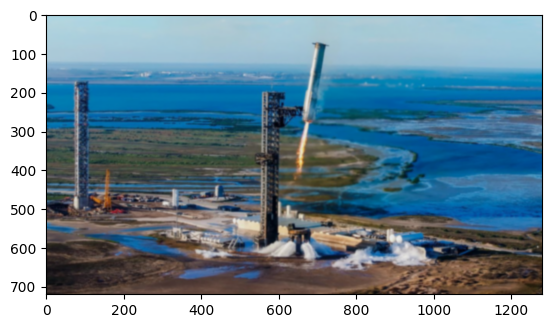

In [33]:
# гауссовское размытие, примененное трижды

result = convolve_rgb(img, gaussian_5, times=3)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)

фильтры для выделения углов, которые представленны ниже,
плохо работают на реальных фотографиях из-за шума

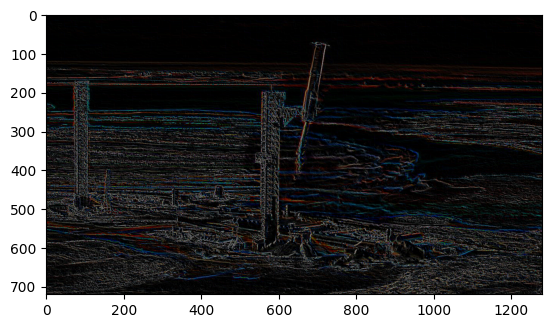

In [ ]:
# оператор Собеля (edge detection)

result_hor = convolve_rgb(img, sobel_hor)
result_ver = convolve_rgb(img, sobel_ver)

result = (result_hor + result_ver) // 2

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)

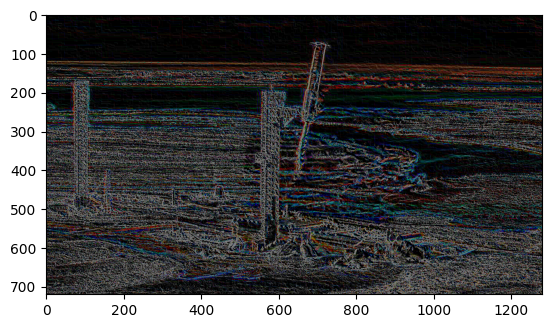

In [35]:
# оператор Щарра

result_hor = convolve_rgb(img, sharr_hor)
result_ver = convolve_rgb(img, sharr_ver)

result = (result_hor + result_ver) // 2

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)

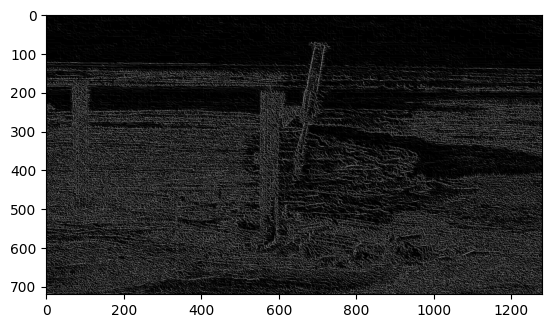

In [37]:
# оператор Собеля, примененный 3 раза на черно-белом изображении

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

result = img_gray

for i in range(3):
    result_hor = convolve_2d(result, sobel_hor)
    result_ver = convolve_2d(result, sobel_ver)

    result = (result_hor + result_ver) // 2

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)